# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
# !kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
# !unzip bus-breakdown-and-delays.zip

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [4]:
# First we can see the first and last and random samples in the dataframe to know what are we going to deal with

In [5]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [6]:
df.sample(5)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
66417,2016-2017,1287200,Special Ed PM Run,GC0001,M303,Heavy Traffic,04050,09/22/2016 04:05:00 PM,09/22/2016 04:06:00 PM,Manhattan,...,20mins,0,No,No,No,09/22/2016 04:06:00 PM,NaN,09/22/2016 04:06:07 PM,Running Late,School-Age
6626,2015-2016,1218449,Special Ed AM Run,822,Q366,Heavy Traffic,26173,10/01/2015 07:24:00 AM,10/01/2015 07:25:00 AM,Queens,...,30MINS,0,Yes,Yes,No,10/01/2015 07:25:00 AM,NaN,10/01/2015 07:25:55 AM,Running Late,School-Age
98215,2016-2017,1319223,Pre-K/EI,9347,1,Heavy Traffic,C457,01/27/2017 08:03:00 AM,01/27/2017 08:05:00 AM,Bronx,...,30 minutes,14,Yes,Yes,No,01/27/2017 08:05:00 AM,NaN,01/27/2017 08:05:16 AM,Running Late,Pre-K
100030,2016-2017,1321103,Special Ed AM Run,5541D,X480,Heavy Traffic,11415,02/06/2017 06:25:00 AM,02/06/2017 06:26:00 AM,Bronx,...,20,0,Yes,Yes,No,02/06/2017 06:26:00 AM,NaN,02/06/2017 06:26:42 AM,Running Late,School-Age
126121,2016-2017,1347503,Special Ed AM Run,4128,K190,Won`t Start,16409,05/11/2017 07:01:00 AM,05/11/2017 07:13:00 AM,Brooklyn,...,20 mins,0,Yes,Yes,No,05/11/2017 07:13:00 AM,NaN,05/11/2017 07:13:47 AM,Running Late,School-Age


In [7]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [8]:
# We can see that there are 19 object features and 2 numerical features

In [9]:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Run_Type,object
Bus_No,object
Route_Number,object
Reason,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Boro,object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [11]:
# We can build that the mean and median of the Number_of_Students_on_The_bus are not close to each other which we could conclude that they are not normally distributed. we can see the same in the minimum value and maximum value that there are a huge outlier

In [12]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [13]:
# We can see the missing values and Incident Number would be dropped immedietly becuase of the huge number of missing values
# for the others would be fill or drop the missing values rows

In [14]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [15]:
for i in df.select_dtypes(include='object'):
  print(f'This is column: {i}')
  print(df[i].value_counts())
  print('-'*20)

This is column: School_Year
School_Year
2016-2017    83141
2015-2016    63184
2017-2018     1646
2019-2020        1
Name: count, dtype: int64
--------------------
This is column: Run_Type
Run_Type
Special Ed AM Run          85990
Pre-K/EI                   20951
Special Ed PM Run          17672
General Ed AM Run          17182
General Ed PM Run           4541
Special Ed Field Trip        628
General Ed Field Trip        570
Project Read PM Run          300
Project Read AM Run           47
Project Read Field Trip        2
Name: count, dtype: int64
--------------------
This is column: Bus_No
Bus_No
9354     468
357      465
9302     434
118      357
9320     349
        ... 
20133      1
1140D      1
553D       1
160D       1
K9345      1
Name: count, Length: 10765, dtype: int64
--------------------
This is column: Route_Number
Route_Number
1         2569
2         2217
3         1904
5         1740
4         1093
          ... 
26Q7MD       1
M688         1
JC-1         1
W656         1

In [16]:
# We can see the data around number zero but still there is a huge skewedness to the right which represent outliers, which could be seen in box plot

<Axes: ylabel='Frequency'>

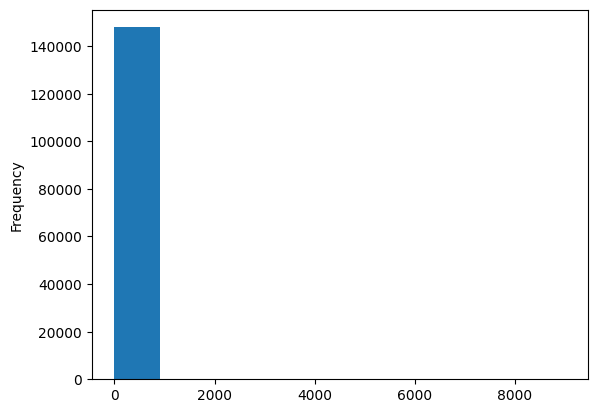

In [17]:
df['Number_Of_Students_On_The_Bus'].plot(kind='hist')

In [18]:
# There are 2 numericals value which doesn't result in anything for creating corr_matrix to get a relationships between the two columns. I will do another relationship test below for the predictor itself

In [19]:
corr_matrix = df.select_dtypes(exclude='object').corr()
corr_matrix

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
Busbreakdown_ID,1.000000,-0.016243
Number_Of_Students_On_The_Bus,-0.016243,1.000000


In [20]:
# We can see the huge number of outliers in box plot of Number of students on the bus
# We are going to solve it using IQR

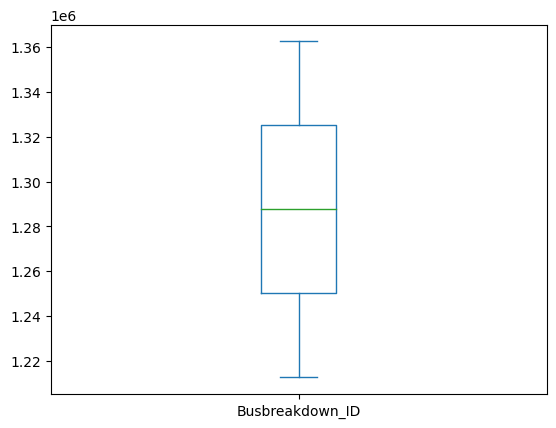

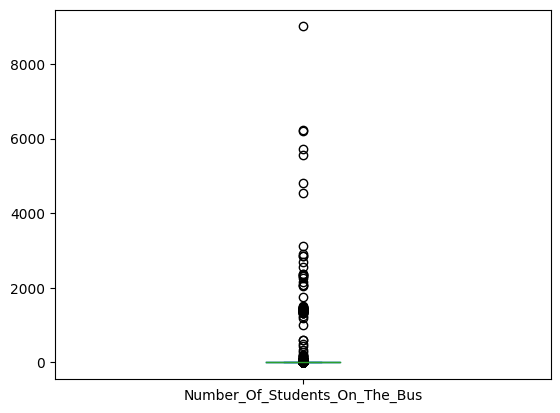

In [21]:
num_cols = df.select_dtypes(exclude='object').columns
df['Busbreakdown_ID'].plot(kind='box')
plt.show()
df['Number_Of_Students_On_The_Bus'].plot(kind='box')
plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [22]:
df.duplicated().sum()

df = df.drop_duplicates()

In [23]:
# Busbreakdown_ID dropped becuase it's an id it will just take resources and doesn't do anything to the model
# Incident_Number dropped becuase of the huge missing values
# Created_On dropped because Occured_on is enough for that
# Last_Updated_On, and Informed_On in making sense it should be related to if ti's a breakdown or running late on the bus itself. Becuase even if there is a relationship it would skew the prediction in bad direction without any reason.

In [24]:
df = df.drop(columns=['Busbreakdown_ID','Incident_Number','Created_On','Last_Updated_On','Informed_On'],axis=1)

In [25]:
# Due to bad formatting of How_Long_Delayed feature, I would dropped it because it's a bad feature that will take time without giving a good informatin and it's hard to fix the format becuase there a lot of different formats.
# it's hard due to the time !!

In [26]:
# df = df.drop(columns=['How_Long_Delayed'],axis=1)

In [27]:
# After checking there are no nulls or na in most common value for each column, filled the missing values with the mode of each column

In [28]:
# df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode()[0])
# df['Route_Number'] = df['Route_Number'].fillna(df['Route_Number'].mode()[0])
# df['Reason'] = df['Reason'].fillna(df['Reason'].mode()[0])
# df['Boro'] = df['Boro'].fillna(df['Boro'].mode()[0])


df.dropna(inplace=True)

# missing_cols = ['Run_Type','Route_Number','Reason','Boro']
# df[missing_cols] = df[missing_cols].fillna(df[missing_cols].mode()[0])

In [29]:
def remove_outliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  Q1 = Q1 - IQR*1.5
  Q3 = Q3 + IQR*1.5
  return df[(df[column] >= Q1) & (df[column] <= Q3)]

df = remove_outliers(df,'Number_Of_Students_On_The_Bus')

In [30]:
# Deciding to Split the data before Encoding, Scaling of the data

In [31]:
X = df.drop('Breakdown_or_Running_Late',axis=1)
y = df['Breakdown_or_Running_Late']

In [32]:
X['Number_Of_Students_On_The_Bus'] = X['Number_Of_Students_On_The_Bus'].fillna(X['Number_Of_Students_On_The_Bus'].mean())

In [33]:
cat_columns = X.select_dtypes(include='object').columns

OE = OrdinalEncoder()
X_transformed = OE.fit_transform(X[cat_columns])
# X_test_transformed = OE.fit_transform(X_test[cat_columns])

In [34]:
X_transformed = pd.DataFrame(X_transformed,columns=cat_columns)
# X_test_transformed = pd.DataFrame(X_test_transformed,columns=cat_columns)

In [36]:
ss = StandardScaler()
X_transformed['Number_Of_Students_On_The_Bus'] = ss.fit_transform(X[['Number_Of_Students_On_The_Bus']])


# X_test_transformed['Number_Of_Students_On_The_Bus'] = ss.fit_transform(X_test[['Number_Of_Students_On_The_Bus']])


In [37]:
y = LabelEncoder().fit_transform(y)
# y_test = LabelEncoder().fit_transform(y_test)

In [38]:
sm = SMOTE(random_state=42)

X, y = sm.fit_resample(X_transformed, y)
# X_test, y_test = sm.fit_resample(X_test_transformed, y_test)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
# I did it above

In [40]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Dropout

from sklearn.metrics import accuracy_score

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [41]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Flatten())
model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.25))
# model.add(Dense(units=64,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849 (3.32 KB)

 Trainable params: 849 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [44]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5717 - loss: 194.5076 - val_accuracy: 0.7470 - val_loss: 0.4926
Epoch 2/20
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7054 - loss: 0.5428 - val_accuracy: 0.7889 - val_loss: 0.4419
Epoch 3/20
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7188 - loss: 0.5160 - val_accuracy: 0.7912 - val_loss: 0.4377
Epoch 4/20
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7271 - loss: 0.5061 - val_accuracy: 0.8201 - val_loss: 0.4052
Epoch 5/20
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.7514 - loss: 0.4791 - val_accuracy: 0.8222 - val_loss: 0.4007
Epoch 6/20
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7551 - loss: 0.4736 - val_accuracy: 0.8127 - val_loss: 0.4089
Epoch 7/20
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7534 - loss: 0.4752 - val_accuracy: 0.8271 - val_loss: 0.3930
Epoch 8/20
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7652 - loss:

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [45]:
model.evaluate(X_test,y_test)

1419/1419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8776 - loss: 0.3216


[0.32135096192359924, 0.8777914643287659]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [46]:
y_pred = model.predict(X_test) >= 0.5

print(accuracy_score(y_test,y_pred)*100)

1419/1419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
87.77914813020305


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

<Axes: >

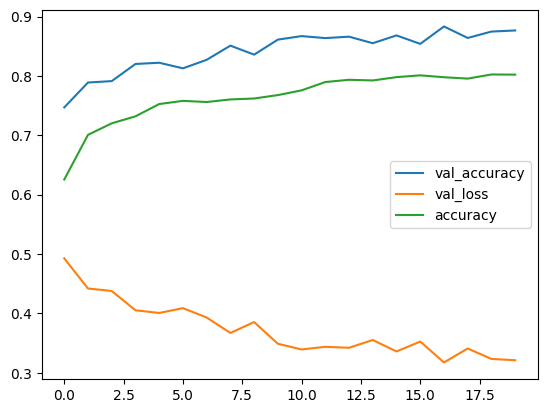

In [50]:
pd.DataFrame(history.history)[['val_accuracy','val_loss','accuracy']].plot()

## Save the Model
Save the trained model for submission.

In [48]:
model.save('ANN_model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1. **Data Preprocessing**: Scaling would be an important step becuase you want most of the numerical data around the mean = 0, and standard diviation = 1. for better predictions. Ordinal encoding becuase One-Hot-Encdoing would be impossible with this huge number of unique values which would result in bad prediction with adding to hard to calculate due to needing more much resources. It help to get a better and faster result in the model.

2. **Model Architecture**: The best architecture would be an easy ANN which have a few units around 10 - 100 and with a small number of layers becuase you don't want to make hard. I created for first 4 layers with 8-16-32-42 untis but I changed it to 8-16-32 with 3 layers because it took much time for just 10 epochs.

3. **Training Process**: Optimizer: Adam is the best opitimizer to choose from all the optimizers and the best to change the LR as fast as it can to make depend on the training data. Epochs = 20 would be to get the best result in the accuracy. Batch size = 32 would be the default and not needing to change it due to good results with 20 epochs with it.
I changed the epochs from 5, 10, and result of both of them below 75% accuracy which is not what I want from the data.

4. **Loss Function and Metrics**:  Loss function would be binary cross entropy due to having just 2 values that could be in output. Metrics would be accuracy because I did the smote to balance all the data including the prediction which is going to result in the same values between the distribution of the dataset especially the predictor which is the best metric would be accuracy.

5. **Regularization Techniques**: I used Dropout to make the accuracy better it didn't help much with accuracy or the speed of the model fitting.

6. **Model Evaluation**: As i said i used accuracy because the data is balanced. It still the evaluation accuracy is bad and it cannot reflect good on the data or the prediction.

7. **Model Tuning (If Done)**: I tried 2 hidden layers or 3 hidden layers and even 4 hidden layers. with regularization or without both of them still give a bad predction and accuracy to the validation set. It is important to test multiple hyperparameter to get the best hyperparameter that could get for the model but with this dataset the model either way is bad.

8. **Overfitting and Underfitting**: It's encoutering underfitting, it can't learn on the training data and even in the testing and validation sets it gives a worse results.